<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q1-PLN/blob/main/2023_Q1_PLN_Notebook_House_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q1]**
Prof. Alexandre Donizeti Alves

## **PROJETO PRÁTICO [Série House]**
---



**Conjunto de Dados**

In [ ]:
import requests
import zipfile
from io import BytesIO

# ID do arquivo zip no Google Drive
file_id = "1_rAzomhikVwtK32LV_yGhTKGuUsoEQ10"

# URL de download do arquivo zip
url = f"https://drive.google.com/uc?id={file_id}&export=download"

# Faz o download do arquivo zip
response = requests.get(url)
file_bytes = BytesIO(response.content)

# Extrai o arquivo zip
with zipfile.ZipFile(file_bytes, "r") as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd

# Lê o arquivo Excel em um DataFrame
df = pd.read_excel('/content/house_season_1-8.xlsx')

df

,season,num_episode,episode,title,director,character,transcript
0,1,1,1.01,Pilot,Bryan Singer,Melanie,Why are you late?
1,1,1,1.01,Pilot,Bryan Singer,Rebecca,You’re not going to like the answer.
2,1,1,1.01,Pilot,Bryan Singer,Melanie,I already know the answer.
3,1,1,1.01,Pilot,Bryan Singer,Rebecca,I missed the bus.
4,1,1,1.01,Pilot,Bryan Singer,Melanie,"I don’t doubt it, no bus stops near Brad’s. Yo..."
...,...,...,...,...,...,...,...
76460,8,177,8.22,Everybody Dies,David Shore,House,Just switched the dental records.
76461,8,177,8.22,Everybody Dies,David Shore,Wilson,You're destroying your entire life. You can't ...
76462,8,177,8.22,Everybody Dies,David Shore,House,"I'm dead, Wilson. How do you want to spend you..."
76463,8,177,8.22,Everybody Dies,David Shore,Wilson,When the cancer starts getting really bad…


**Análise de Sentimentos**

A análise de sentimentos pode ser aplicada de várias maneiras sobre a série "House". Aqui estão algumas ideias:

   * Análise dos personagens mais populares: utilize a análise de sentimentos para determinar quais personagens são mais populares com o público. Analise o sentimento expressado em torno de cada personagem e encontre aqueles com os sentimentos mais positivos (ou negativos).

   * Análise dos episódios mais populares: utilize a análise de sentimentos para determinar quais episódios são os mais populares entre o público. Analise o sentimento expressado em torno de cada episódio e encontre aqueles com os sentimentos mais positivos.

   * Análise da evolução emocional dos personagens: utilize a análise de sentimentos para acompanhar a evolução emocional dos personagens ao longo da série. Analise o sentimento expressado em torno de cada personagem em cada episódio e determine como seus sentimentos mudaram ao longo do tempo.

   * Análise de tendências de sentimentos ao longo da série: utilize a análise de sentimentos para identificar tendências de sentimentos ao longo da série. Analise o sentimento expressado em torno de diferentes personagens, episódios ou aspectos da série e determine se há tendências de sentimentos positivos, negativos ou neutros ao longo do tempo.


**`Transformers`**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.7 MB/s eta 0:00:00


In [ ]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [ ]:
def get_transcripts_by_character_season(df, character, seasons):
    # Filtra o DataFrame pelo nome do personagem e as temporadas desejadas
    filtered_df = df[(df['character'] == character) & (df['season'].isin(seasons))]
    
    # Retorna todas as falas do personagem 
    return filtered_df['transcript']

In [ ]:
get_transcripts_by_character_season(df, 'Foreman', [1])

56                                         It’s a lesion.
58      Shouldn’t we be speaking to the patient before...
60                                               No, but…
63         Isn’t treating patients why we became doctors?
65      So you’re trying to eliminate the humanity fro...
                              ...                        
9776                       You need the consent from him.
9788    This is not good.  He could have embolism, tac...
9793                   It’s not an attack, he’s stroking!
9797    Heart rate’s in the 40s, bradycardia, we’re lo...
9801    You were wrong!  [House doesn’t listen, but gr...
Name: transcript, Length: 1179, dtype: object

In [ ]:
def get_sentiments_by_character_season(df, character, seasons):

    # Cria um objeto de pipeline para análise de sentimentos
    classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
    
    # Filtra o DataFrame pelo nome do personagem e as temporadas desejadas
    filtered_df = df[(df['character'] == character) & (df['season'].isin(seasons))]
    
    # Aplica a análise de sentimento em cada fala do personagem
    results = []
    for row in filtered_df.itertuples():
        sentiment = classifier(row.transcript)[0]
        results.append({'season': row.season, 'num_episode': row.num_episode, 'episode': row.episode, 
                        'transcript': row.transcript, 'label': sentiment['label'], 'score': sentiment['score']})
    
    # Cria um novo DataFrame com as informações de cada fala do personagem
    new_df = pd.DataFrame(results)
    
    # Retorna o novo DataFrame
    return new_df

In [ ]:
sentiments_df = get_sentiments_by_character_season(df, 'Foreman', [1])

sentiments_df

,season,num_episode,episode,transcript,label,score
0,1,1,1.01,It’s a lesion.,negative,0.917171
1,1,1,1.01,Shouldn’t we be speaking to the patient before...,neutral,0.764115
2,1,1,1.01,"No, but…",neutral,0.640784
3,1,1,1.01,Isn’t treating patients why we became doctors?,negative,0.614824
4,1,1,1.01,So you’re trying to eliminate the humanity fro...,negative,0.897427
...,...,...,...,...,...,...
1174,1,22,1.22,You need the consent from him.,neutral,0.685039
1175,1,22,1.22,"This is not good. He could have embolism, tac...",negative,0.883720
1176,1,22,1.22,"It’s not an attack, he’s stroking!",negative,0.625145
1177,1,22,1.22,"Heart rate’s in the 40s, bradycardia, we’re lo...",negative,0.897126


In [ ]:
def get_sentiment_summary(sentiments_df):
    # Calcula a média dos scores para cada sentimento
    mean_scores = sentiments_df.groupby('label')['score'].mean()
    
    # Verifica qual sentimento teve o maior score médio
    max_sentiment = mean_scores.idxmax()
    
    # Retorna o resultado formatado
    if max_sentiment == 'negative':
        return "NEGATIVO", mean_scores[max_sentiment]
    elif max_sentiment == 'positive':
        return "POSITIVO", mean_scores[max_sentiment]
    else:
        return "NEUTRO", mean_scores['neutral']

In [ ]:
get_sentiment_summary(sentiments_df)

('NEGATIVO', 0.728348998221893)

In [ ]:
def get_sentiment_stats(sentiments_df):
    # Total de frases
    total = len(sentiments_df)
    
    # Total de frases positivas
    pos_count = len(sentiments_df[sentiments_df['label'] == 'positive'])
    
    # Total de frases negativas
    neg_count = len(sentiments_df[sentiments_df['label'] == 'negative'])
    
    # Total de frases neutras
    neu_count = len(sentiments_df[sentiments_df['label'] == 'neutral'])
    
    # Percentual de frases positivas
    pos_perc = round((pos_count / total) * 100, 2)
    
    # Percentual de frases negativas
    neg_perc = round((neg_count / total) * 100, 2)
    
    # Percentual de frases neutras
    neu_perc = round((neu_count / total) * 100, 2)
    
    # Retorna um dicionário com as estatísticas
    return {
        'Total': total,
        'Positivas': pos_count,
        'Negativas': neg_count,
        'Neutras': neu_count,
        '% Positivas': pos_perc,
        '% Negativas': neg_perc,
        '% Neutras': neu_perc
    }

In [ ]:
get_sentiment_stats(sentiments_df)

{'Total': 1179,
 'Positivas': 97,
 'Negativas': 583,
 'Neutras': 499,
 '% Positivas': 8.23,
 '% Negativas': 49.45,
 '% Neutras': 42.32}

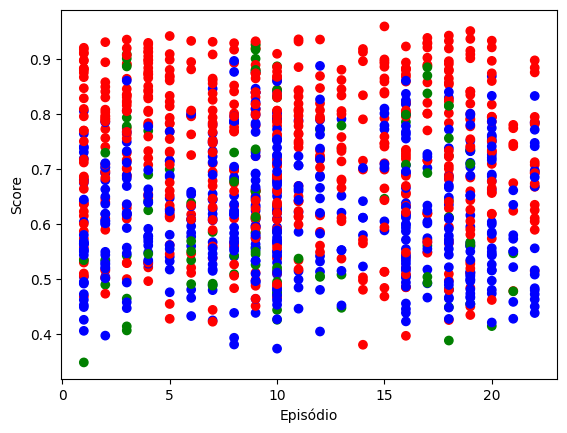

In [ ]:
import matplotlib.pyplot as plt

# Mapeia as cores de acordo com o label
colors = {"positive": "green", "negative": "red", "neutral": "blue"}

# Cria o gráfico de dispersão
plt.scatter(sentiments_df["num_episode"], sentiments_df["score"], c=sentiments_df["label"].apply(lambda x: colors[x]))

# Adiciona rótulos nos eixos x e y
plt.xlabel("Episódio")
plt.ylabel("Score")

# Exibe o gráfico
plt.show()

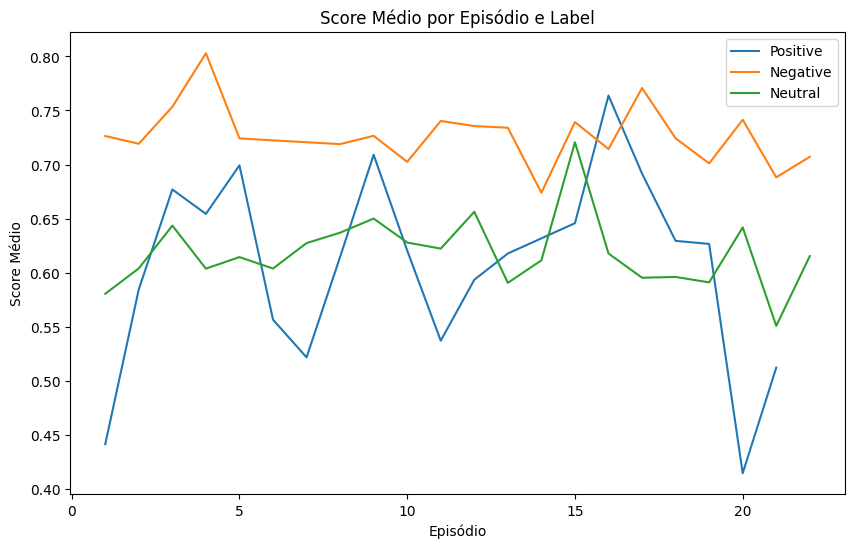

In [ ]:
import matplotlib.pyplot as plt

# Agrupa os dados por temporada, episódio e label, e calcula o score médio de cada grupo
grouped = sentiments_df.groupby(['season', 'num_episode', 'label'])['score'].mean().reset_index()

# Separa os dados em diferentes DataFrames de acordo com o label
positive_scores = grouped[grouped['label'] == 'positive']
negative_scores = grouped[grouped['label'] == 'negative']
neutral_scores = grouped[grouped['label'] == 'neutral']

# Cria o gráfico de linhas
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(positive_scores['num_episode'], positive_scores['score'], label='Positive')
ax.plot(negative_scores['num_episode'], negative_scores['score'], label='Negative')
ax.plot(neutral_scores['num_episode'], neutral_scores['score'], label='Neutral')

ax.set_xlabel('Episódio')
ax.set_ylabel('Score Médio')
ax.set_title('Score Médio por Episódio e Label')
ax.legend()

plt.show()

In [ ]:
def get_sentiments_by_character_episode(df, character, episodes):
    
    # Cria um objeto de pipeline para análise de sentimentos
    classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
    
    # Filtra o DataFrame pelo nome do personagem e os episódios desejados
    filtered_df = df[(df['character'] == character) & (df['episode'].isin(episodes))]
    
    # Aplica a análise de sentimento em cada fala do personagem
    results = []
    for row in filtered_df.itertuples():
        sentiment = classifier(row.transcript)[0]
        results.append({'season': row.season, 'num_episode': row.num_episode, 'episode': row.episode, 
                        'transcript': row.transcript, 'label': sentiment['label'], 'score': sentiment['score']})    
    
    # Cria um novo DataFrame com as informações de cada fala do personagem
    new_df = pd.DataFrame(results)
    
    # Retorna o novo DataFrame
    return new_df

In [ ]:
sentiments_df = get_sentiments_by_character_episode(df, 'Foreman', [1.01, 1.02, 1.03, 1.04, 1.05])

In [ ]:
sentiments_df

,season,num_episode,episode,transcript,label,score
0,1,1,1.01,It’s a lesion.,negative,0.917171
1,1,1,1.01,Shouldn’t we be speaking to the patient before...,neutral,0.764115
2,1,1,1.01,"No, but…",neutral,0.640784
3,1,1,1.01,Isn’t treating patients why we became doctors?,negative,0.614824
4,1,1,1.01,So you’re trying to eliminate the humanity fro...,negative,0.897427
...,...,...,...,...,...,...
288,1,5,1.05,On her medical history she didn’t mention any ...,neutral,0.580444
289,1,5,1.05,"No piercings, no fillings, no surgical pins in...",negative,0.618545
290,1,5,1.05,What is that?,neutral,0.623395
291,1,5,1.05,Lock on it. Get a 3D representation. [The imag...,neutral,0.767769


In [ ]:
get_sentiment_stats(sentiments_df)

{'Total': 293,
 'Positivas': 20,
 'Negativas': 165,
 'Neutras': 108,
 '% Positivas': 6.83,
 '% Negativas': 56.31,
 '% Neutras': 36.86}

In [ ]:
import matplotlib.pyplot as plt

def plot_scores_by_episode(sentiments_df):
    # Agrupa os dados por temporada, episódio e label, e calcula o score médio de cada grupo
    grouped = sentiments_df.groupby(['season', 'num_episode', 'label'])['score'].mean().reset_index()

    # Separa os dados em diferentes DataFrames de acordo com o label
    positive_scores = grouped[grouped['label'] == 'positive']
    negative_scores = grouped[grouped['label'] == 'negative']
    neutral_scores = grouped[grouped['label'] == 'neutral']

    # Cria o gráfico de linhas
    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(positive_scores['num_episode'], positive_scores['score'], label='Positive')
    ax.plot(negative_scores['num_episode'], negative_scores['score'], label='Negative')
    ax.plot(neutral_scores['num_episode'], neutral_scores['score'], label='Neutral')

    ax.set_xlabel('Episódio')
    ax.set_ylabel('Score Médio')
    ax.set_title('Score Médio por Episódio e Label')
    ax.legend()

    # Define que os valores do eixo x serão os números dos episódios
    ax.set_xticks(grouped['num_episode'])

    ax.axhline(y=0.7, color='gray', linestyle='--')

    plt.show()

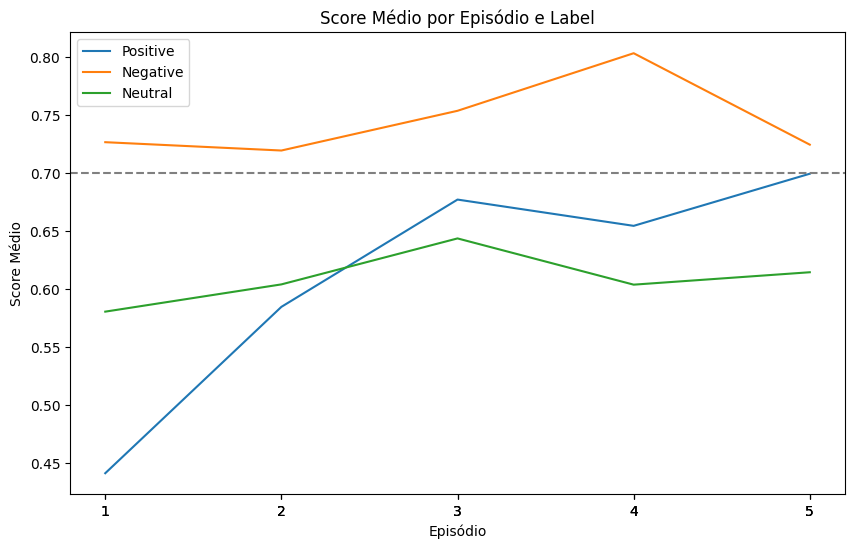

In [ ]:
plot_scores_by_episode(sentiments_df)

In [ ]:
def get_sentiments_by_episode(df, episodes):
    
    # Cria um objeto de pipeline para análise de sentimentos
    classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
    
    # Filtra o DataFrame pelos episódios desejados
    filtered_df = df[df['episode'].isin(episodes)]
    
    # Aplica a análise de sentimento em cada fala
    results = []
    for row in filtered_df.itertuples():
        sentiment = classifier(row.transcript)[0]
        results.append({'season': row.season, 'num_episode': row.num_episode, 'episode': row.episode, 
                        'transcript': row.transcript, 'label': sentiment['label'], 'score': sentiment['score']})    
    
    # Cria um novo DataFrame com as informações de cada fala
    new_df = pd.DataFrame(results)
    
    # Retorna o novo DataFrame
    return new_df

In [ ]:
sentiments_df = get_sentiments_by_episode(df, [1.01, 1.02, 1.03, 1.04, 1.05])

In [ ]:
sentiments_df

,season,num_episode,episode,transcript,label,score
0,1,1,1.01,Why are you late?,negative,0.755097
1,1,1,1.01,You’re not going to like the answer.,negative,0.588568
2,1,1,1.01,I already know the answer.,neutral,0.688601
3,1,1,1.01,I missed the bus.,negative,0.780523
4,1,1,1.01,"I don’t doubt it, no bus stops near Brad’s. Yo...",negative,0.785828
...,...,...,...,...,...,...
2300,1,5,1.05,[quickly] Neither do I. [Cuddy enters.],negative,0.484097
2301,1,5,1.05,You did good with the nun. Congratulations.,positive,0.938121
2302,1,5,1.05,Thank you.,positive,0.866082
2303,1,5,1.05,"Merry Christmas, Dr. House. Dr. Wilson. [She l...",positive,0.547096


In [ ]:
get_sentiment_stats(sentiments_df)

{'Total': 2305,
 'Positivas': 237,
 'Negativas': 1051,
 'Neutras': 1017,
 '% Positivas': 10.28,
 '% Negativas': 45.6,
 '% Neutras': 44.12}

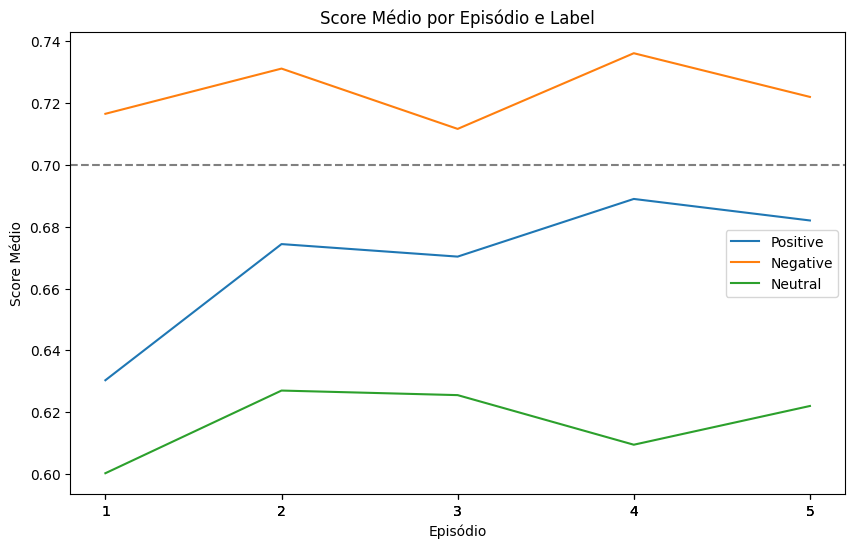

In [ ]:
plot_scores_by_episode(sentiments_df)

In [ ]:
import spacy

def get_sentiments_by_episode_noun_adj(df, episodes):
    
    # Cria um objeto de pipeline para análise de sentimentos
    classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
    
    # Carrega o modelo do spaCy para o idioma desejado
    nlp = spacy.load("en_core_web_sm")
    
    # Filtra o DataFrame pelos episódios desejados
    filtered_df = df[df['episode'].isin(episodes)]
    
    # Aplica a análise de sentimento em cada fala que tenha pelo menos um substantivo e um adjetivo
    results = []
    for row in filtered_df.itertuples():
        doc = nlp(row.transcript)
        has_noun = False
        has_adj = False
        for token in doc:
            if token.pos_ == 'NOUN':
                has_noun = True
            elif token.pos_ == 'ADJ':
                has_adj = True
            if has_noun and has_adj:
                sentiment = classifier(row.transcript)[0]
                results.append({'season': row.season, 'num_episode': row.num_episode, 'episode': row.episode, 
                                'transcript': row.transcript, 'label': sentiment['label'], 'score': sentiment['score']})
                break
    
    # Cria um novo DataFrame com as informações de cada fala
    new_df = pd.DataFrame(results)
    
    # Retorna o novo DataFrame
    return new_df

In [ ]:
sentiments_df = get_sentiments_by_episode_noun_adj(df, [1.01, 1.02, 1.03, 1.04, 1.05])

In [ ]:
sentiments_df

,season,num_episode,episode,transcript,label,score
0,1,1,1.01,I wouldn’t lie to you. [Turns to class of 5 ye...,positive,0.633957
1,1,1,1.01,Good morning Miss Rebecca!,positive,0.832952
2,1,1,1.01,"Ok, Sidney, why don’t you tell us what you did...",negative,0.454557
3,1,1,1.01,"Ok, I had a really great weekend, but you can’...",neutral,0.415631
4,1,1,1.01,I made a new friend. It’s so much fun to make ...,positive,0.905286
...,...,...,...,...,...,...
856,1,5,1.05,"Kidneys functioning, heart rate is normal. You...",neutral,0.582089
857,1,5,1.05,"Yeah, and if Cuddy hadn’t taken you off the ca...",negative,0.796665
858,1,5,1.05,Your wife doesn’t mind being alone at Christmas?,neutral,0.484853
859,1,5,1.05,You did good with the nun. Congratulations.,positive,0.938121


In [ ]:
get_sentiment_stats(sentiments_df)

{'Total': 861,
 'Positivas': 109,
 'Negativas': 485,
 'Neutras': 267,
 '% Positivas': 12.66,
 '% Negativas': 56.33,
 '% Neutras': 31.01}

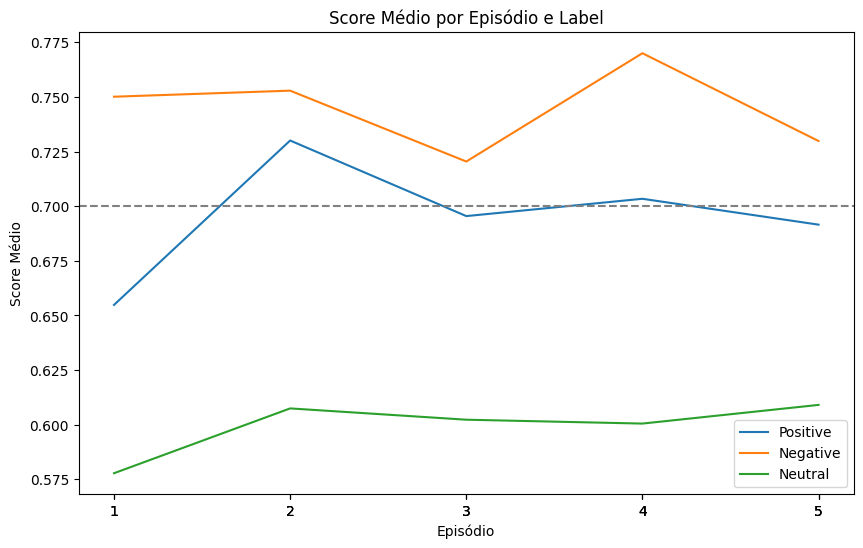

In [ ]:
plot_scores_by_episode(sentiments_df)

In [ ]:
def get_sentiments_by_season(df, seasons):
    
    # Cria um objeto de pipeline para análise de sentimentos
    classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
    
    # Filtra o DataFrame pelas temporadas desejadas
    filtered_df = df[df['season'].isin(seasons)]
    
    # Aplica a análise de sentimento em cada fala
    results = [{'season': row.season, 'num_episode': row.num_episode, 'episode': row.episode, 
                'transcript': row.transcript, 'label': classifier(row.transcript)[0]['label'], 
                'score': classifier(row.transcript)[0]['score']}
                for row in filtered_df.itertuples()]
    
    # Cria um novo DataFrame com as informações de cada fala
    new_df = pd.DataFrame(results)
    
    # Retorna o novo DataFrame
    return new_df

In [ ]:
sentiments_df = get_sentiments_by_season(df, [1])

In [ ]:
sentiments_df

,season,num_episode,episode,transcript,label,score
0,1,1,1.01,Why are you late?,negative,0.755097
1,1,1,1.01,You’re not going to like the answer.,negative,0.588568
2,1,1,1.01,I already know the answer.,neutral,0.688601
3,1,1,1.01,I missed the bus.,negative,0.780523
4,1,1,1.01,"I don’t doubt it, no bus stops near Brad’s. Yo...",negative,0.785828
...,...,...,...,...,...,...
9824,1,22,1.22,[loudly] I will not have sex with you! Not ag...,negative,0.945441
9825,1,22,1.22,Stacy’s husband is going to need close monitor...,positive,0.539218
9826,1,22,1.22,Did she say yes?,neutral,0.714240
9827,1,22,1.22,She said only if it was okay with you. [House...,neutral,0.695069


In [ ]:
get_sentiment_stats(sentiments_df)

{'Total': 9829,
 'Positivas': 1026,
 'Negativas': 4491,
 'Neutras': 4312,
 '% Positivas': 10.44,
 '% Negativas': 45.69,
 '% Neutras': 43.87}

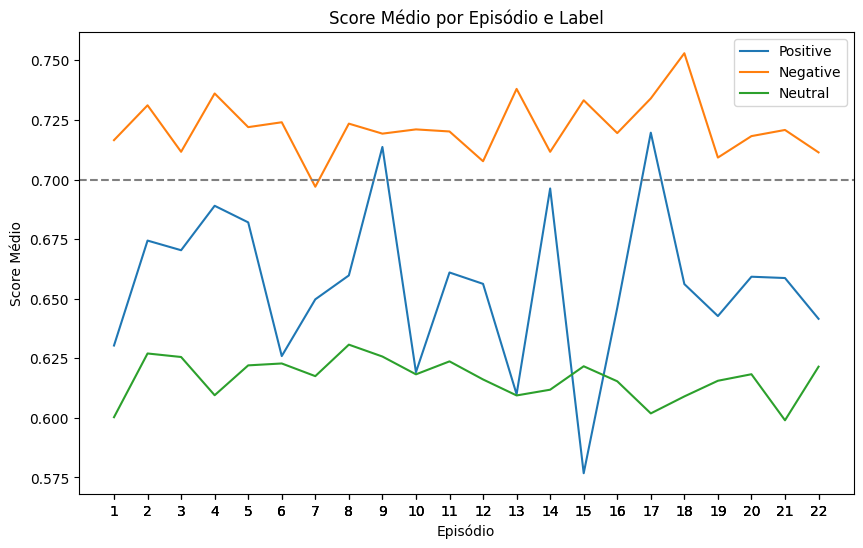

In [ ]:
plot_scores_by_episode(sentiments_df)

In [ ]:
def get_sentiments_by_characters_episodes(df, characters, episodes):
    
    # Cria um objeto de pipeline para análise de sentimentos
    classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
    
    # Filtra o DataFrame pelos personagens e episódios desejados
    filtered_df = df[(df['character'].isin(characters)) & (df['episode'].isin(episodes))]
    
    # Aplica a análise de sentimento em cada fala dos personagens
    results = []
    for row in filtered_df.itertuples():
        sentiment = classifier(row.transcript)[0]
        results.append({'season': row.season, 'num_episode': row.num_episode, 'episode': row.episode,
                        'character': row.character, 'transcript': row.transcript, 
                        'label': sentiment['label'], 'score': sentiment['score']})    
    
    # Cria um novo DataFrame com as informações de cada fala dos personagens
    new_df = pd.DataFrame(results)
    
    # Retorna o novo DataFrame
    return new_df

In [ ]:
sentiments_df = get_sentiments_by_characters_episodes(df, ['House', 'Foreman', 'Chase', 'Cameron'], [1.01, 1.02, 1.03, 1.04, 1.05])

In [ ]:
sentiments_df

,season,num_episode,episode,character,transcript,label,score
0,1,1,1.01,House,See that? They all assume I’m a patient becaus...,negative,0.785419
1,1,1,1.01,House,I don’t want them to think I’m a doctor.,negative,0.719204
2,1,1,1.01,House,People don’t want a sick doctor.,negative,0.766890
3,1,1,1.01,House,"The one who can’t talk, I liked that part.",positive,0.635944
4,1,1,1.01,House,And your cousin doesn’t like the diagnosis. I ...,negative,0.929427
...,...,...,...,...,...,...,...
1454,1,5,1.05,House,You’re Jewish.,neutral,0.535218
1455,1,5,1.05,House,No thanks.,negative,0.894732
1456,1,5,1.05,House,Your wife doesn’t mind being alone at Christmas?,neutral,0.484853
1457,1,5,1.05,House,[quickly] Neither do I. [Cuddy enters.],negative,0.484097


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scores_by_episode_character(sentiments_df):
    # Agrupa os dados por personagem, episódio e label, e calcula o score médio de cada grupo
    grouped = sentiments_df.groupby(['character', 'season', 'num_episode', 'label'])['score'].mean().reset_index()

    # Define os personagens únicos
    characters = grouped['character'].unique()

    # Define a quantidade de linhas e colunas do subplot
    n_rows = int(len(characters) / 2)
    n_cols = 2

    # Cria o subplot para cada personagem
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 8))

    # Define as cores para cada label
    colors = {'positive': '#1f77b4', 'negative': '#d62728', 'neutral': '#2ca02c'}

    # Itera sobre cada personagem e cria o gráfico para cada subplot
    for i, character in enumerate(characters):
        row = i // n_cols
        col = i % n_cols

        # Seleciona os dados para o personagem atual
        data = grouped[grouped['character'] == character]

        # Cria o gráfico de linhas com as médias de score para cada episódio
        sns.lineplot(ax=axs[row, col], data=data, x='num_episode', y='score', hue='label', palette=colors)

        # Define o título e os labels dos eixos
        axs[row, col].set_title(f'{character}')
        axs[row, col].set_xlabel('Episódio')
        axs[row, col].set_ylabel('Score Médio')

         # Define os valores do eixo x como números dos episódios
        axs[row, col].set_xticks(data['num_episode'])

        axs[row, col].axhline(y=0.7, color='gray', linestyle='--')

    # Ajusta a posição dos subplots
    fig.tight_layout()

    plt.show()

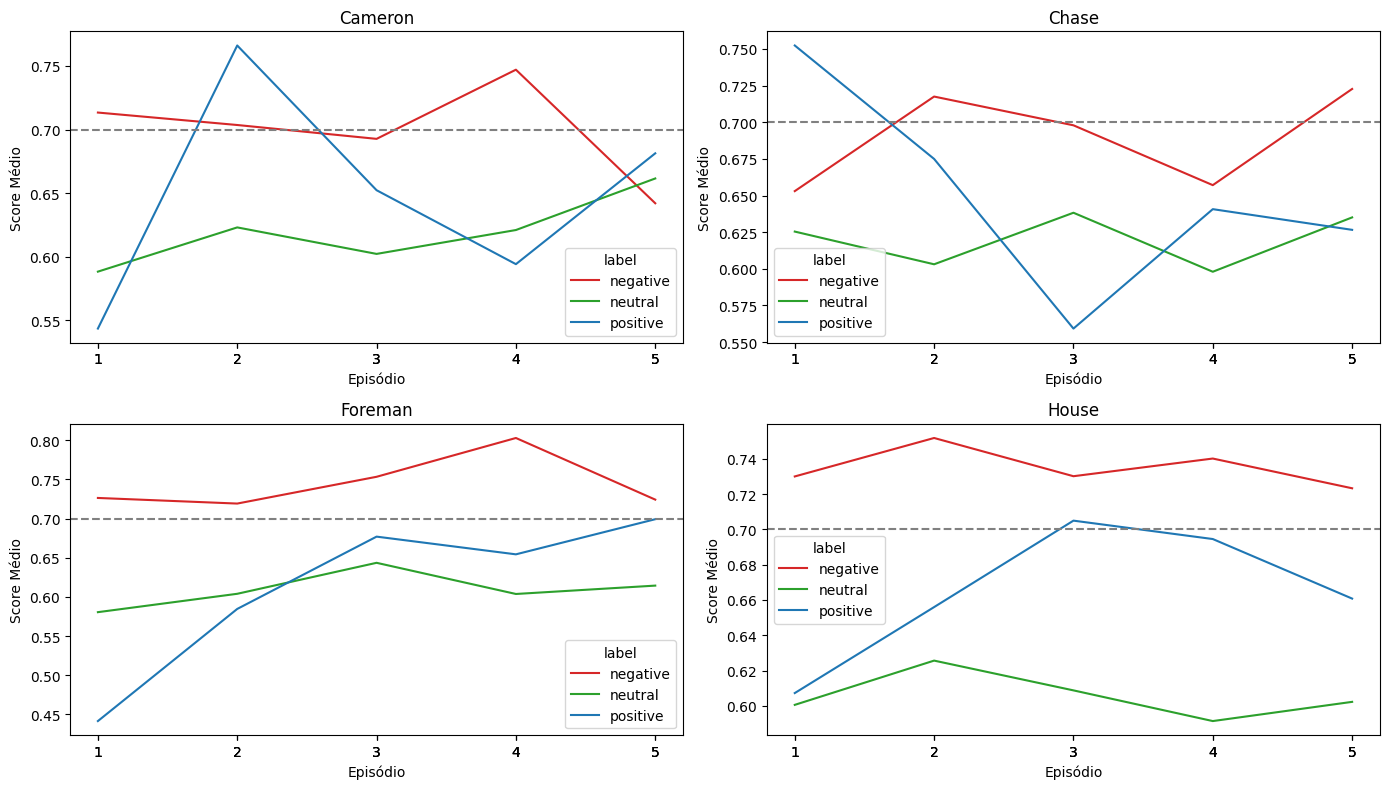

In [ ]:
plot_scores_by_episode_character(sentiments_df)